In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [3]:
df = pd.read_csv('winequalityN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


# Count Plot
Get count of results

<AxesSubplot:xlabel='quality', ylabel='count'>

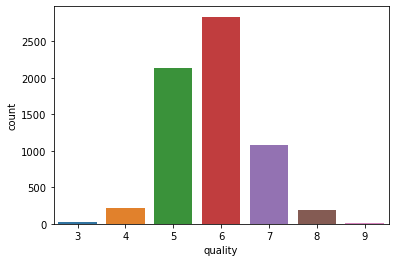

In [4]:
sns.countplot(x="quality",data=df)

Data indicates most wines are in the middle regarding quality

<AxesSubplot:xlabel='type', ylabel='count'>

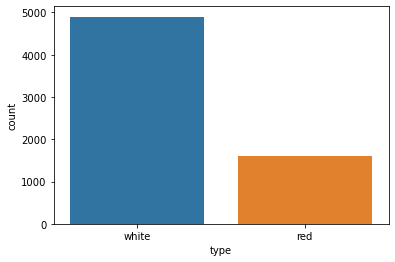

In [5]:
sns.countplot(x='type', data=df)

## Check correlation on data values

In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<AxesSubplot:>

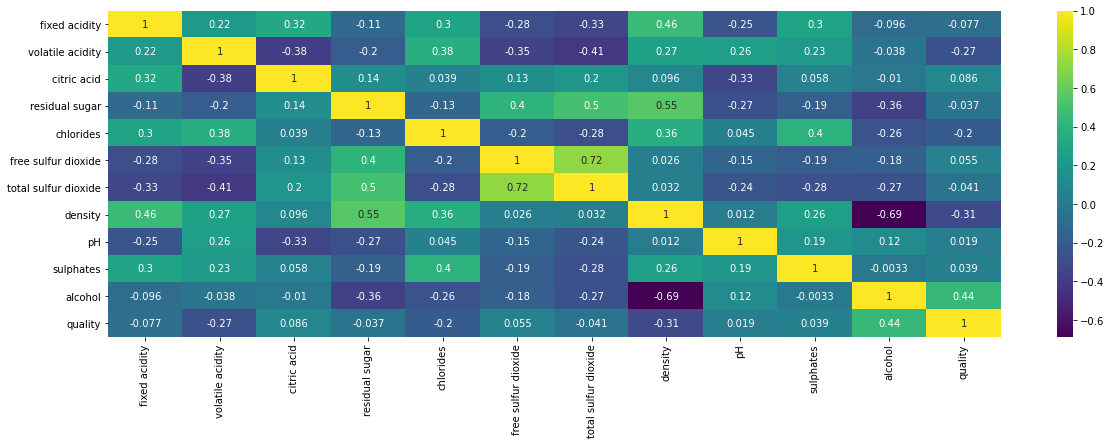

In [7]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

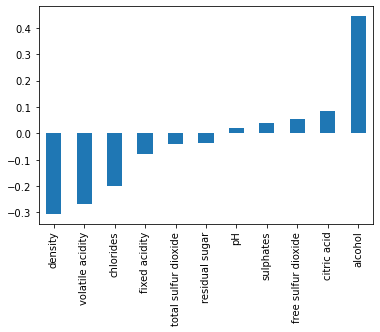

In [8]:
#show the highest negative/positive corr to quality
df.corr()['quality'].sort_values().drop('quality').plot(kind='bar')

# Data Preprocessing

- Determine Missing data

In [9]:
len(df)

6497

In [10]:
#get count of missing data/column
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
#get percentage of null data/column
(100 * df.isnull().sum() / len(df)).sort_values(ascending=False)

fixed acidity           0.153917
pH                      0.138525
volatile acidity        0.123134
sulphates               0.061567
citric acid             0.046175
chlorides               0.030783
residual sugar          0.030783
quality                 0.000000
alcohol                 0.000000
density                 0.000000
total sulfur dioxide    0.000000
free sulfur dioxide     0.000000
type                    0.000000
dtype: float64

In [12]:
#get cols with null vals
cols_with_nvs = [col for col in df.columns if df[col].isnull().sum() > 0]
cols_with_nvs

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'pH',
 'sulphates']

In [13]:
#use avg value for column to fill in null data
for col in cols_with_nvs:
    df[col].fillna(df[col].mean(), inplace=True)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Work with Categorical Data

In [14]:
df.select_dtypes(['object']).columns

Index(['type'], dtype='object')

In [15]:
dummies = pd.get_dummies(df['type'],drop_first=True)

In [16]:
df = pd.concat([df.drop('type',axis=1),dummies],axis=1)

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [18]:
#create binary column for high quality
df['high_quality'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,high_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


In [21]:
#check if worked
df[df['high_quality'] == 1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,high_quality
13,6.600000,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,1,1
15,6.600000,0.17,0.38,1.5,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7,1,1
17,7.216579,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1,1
20,6.200000,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8,1,1
21,6.400000,0.31,0.38,2.9,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,7,1,1


In [22]:
df.to_csv('clean_data.csv')